In [78]:
from platform import python_version
python_version()

'3.10.4'

In [79]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [80]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [81]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower

In [82]:
import pandas as pd
import numpy as np
import tensorflow as tf

import data_transformer as dataTransformer
from Utils_Python.database_connector.DatabaseConnector import DatabaseConnector
from Utils_Python.file_writer.FileWriter import FileWriter
from Utils_Python.file_reader.FileReader import FileReader

In [83]:
POINT_IN_A_DAY = 96
ADJUSTER = 2.103
ROW_COUNT = (POINT_IN_A_DAY * 5 * 2) * ADJUSTER  # (Points in 1 day * Number of Days * Number of Weeks) * n
DATABASE_NAME = 'IG_TRADING'
SCHEMA_NAME = 'FOREX_MINI'
TABLE_NAME = 'GBPUSD_15MIN'
DATA_PATH = '/ScalpFX/src/data'
MODEL_PATH = '/ScalpFX/src/model'

In [84]:
TMP_DATA_PATH = '/ScalpFX/src/data/tmp_df.pkl'
TMP_DF_PATH = '/ScalpFX/src/data/tmp_df.pkl'
TMP_TRANS_PATH = '/ScalpFX/src/data/tmp_trans.pkl'
TMP_NORM_PATH = '/ScalpFX/src/data/tmp_norm.pkl'
TMP_PREP_PATH = '/ScalpFX/src/data/tmp_prep.json'

In [85]:
def closeDatabaseConnection(databaseConnector, cur, connObject):
    cur.close()
    databaseConnector.closeConnection(connObject)

In [86]:
# def getTrainingData(filePathToWrite, connTag, verbose=False):
filePathToWrite = TMP_DATA_PATH
connTag = "PostgresqlIgTrading"
verbose = False

databaseConnector = DatabaseConnector()
connObject = databaseConnector.openConnection(connTag)
conn = connObject['connection']
cur = conn.cursor()

query = (   
            f"SELECT * "
            f"FROM \"{DATABASE_NAME}\".\"{SCHEMA_NAME}\".\"{TABLE_NAME}\" "
            f"ORDER BY datetime DESC "
            f"LIMIT {ROW_COUNT}"
        )

colNames = None
try:
    cur.execute(query)
    colNames = [desc[0] for desc in cur.description]
except Exception as e:
    closeDatabaseConnection(databaseConnector, cur, connObject)
    raise Exception(f"Could not execute: {query}\n{e}")

res = cur.fetchall()    
closeDatabaseConnection(databaseConnector, cur, connObject)

df = pd.DataFrame(res, columns=colNames)
df = df.sort_values(['datetime'], ascending=True).reset_index()
df = df.drop(['index'], axis = 1)

if verbose:
    print('getTrainingData()')
    print(f"{df}\n")

df.to_pickle(filePathToWrite)
print(f"Training Data has been saved to '{filePathToWrite}'\n")


df

Successfully connect to 'PostgresqlIgTrading' database, with connection ID 'PostgresqlIgTrading_0qAUIVi3'!
Successfully close the 'PostgresqlIgTrading_0qAUIVi3' connection!
Training Data has been saved to '/ScalpFX/src/data/tmp_df.pkl'



,datetime,open,high,low,close,volume,inserted_on_myt
0,2022-06-03 23:00:00,1.25239,1.25241,1.25123,1.25164,1896,NaT
1,2022-06-03 23:15:00,1.25166,1.25169,1.25062,1.25075,1565,NaT
2,2022-06-03 23:30:00,1.25073,1.25136,1.25064,1.25075,1669,NaT
3,2022-06-03 23:45:00,1.25078,1.25096,1.24919,1.24926,1711,NaT
4,2022-06-04 00:00:00,1.24927,1.25021,1.24926,1.25012,1596,NaT
...,...,...,...,...,...,...,...
2014,2022-07-04 17:45:00,1.21266,1.21279,1.21203,1.21208,2094,2022-07-04 18:00:17
2015,2022-07-04 18:00:00,1.21209,1.21299,1.21207,1.21279,2136,2022-07-04 18:16:22
2016,2022-07-04 18:15:00,1.21279,1.21347,1.21242,1.21264,1874,2022-07-04 18:32:17
2017,2022-07-04 18:30:00,1.21263,1.21320,1.21212,1.21307,1934,2022-07-04 18:48:16


In [87]:
# def removeColumns(filePathToRead, filePathToWrite, columnNames, verbose=False):
filePathToRead = TMP_DF_PATH
filePathToWrite = TMP_DF_PATH
columnNames = ['datetime', 'inserted_on_myt']
verbose = False

df = pd.read_pickle(filePathToRead)

# df.index = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')
working_df = df.drop(columns=columnNames)

if verbose:
    print('removeColumns()')
    print(f"{working_df}\n")

working_df.to_pickle(filePathToWrite)
print(f"Removed Columns' Training Data has been saved to '{filePathToWrite}'\n")


working_df

Removed Columns' Training Data has been saved to '/ScalpFX/src/data/tmp_df.pkl'



,open,high,low,close,volume
0,1.25239,1.25241,1.25123,1.25164,1896
1,1.25166,1.25169,1.25062,1.25075,1565
2,1.25073,1.25136,1.25064,1.25075,1669
3,1.25078,1.25096,1.24919,1.24926,1711
4,1.24927,1.25021,1.24926,1.25012,1596
...,...,...,...,...,...
2014,1.21266,1.21279,1.21203,1.21208,2094
2015,1.21209,1.21299,1.21207,1.21279,2136
2016,1.21279,1.21347,1.21242,1.21264,1874
2017,1.21263,1.21320,1.21212,1.21307,1934


In [88]:
# def transformData(filePathToRead, filePathToWrite, verbose=False):
filePathToRead = TMP_DF_PATH
filePathToWrite = TMP_TRANS_PATH
verbose = False

df = pd.read_pickle(filePathToRead)

working_df = dataTransformer.calcFeaturesEngineering(df, verbose=verbose)
working_df = dataTransformer.calcTA(working_df, verbose=verbose)
working_df = working_df.reset_index()
working_df = working_df.drop(['index'], axis = 1)

working_df.to_pickle(filePathToWrite)
print(f"Transformed Data has been saved to '{filePathToWrite}'\n")

working_df

C:\Users\zaimp\anaconda3\envs\ScalpFX\lib\site-packages\ta\trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\zaimp\anaconda3\envs\ScalpFX\lib\site-packages\ta\trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


Transformed Data has been saved to '/ScalpFX/src/data/tmp_trans.pkl'



,open,high,low,close,volume,O-H,O-L,C-H,C-L,H-L,...,Trend_MI,Trend_SMA_12,Trend_SMA_50,Trend_SMA_100,Trend_STC,Trend_TRIX,Trend_VI_vortex_indicator_diff,Trend_VI_vortex_indicator_neg,Trend_VI_vortex_indicator_pos,Trend_WMA
0,1.25475,1.25611,1.25445,1.25564,2732,0.00136,0.00030,0.00047,0.00119,0.00166,...,25.426151,1.255033,1.253478,1.251541,50.000122,0.001876,-0.180498,1.065698,0.885201,1.255003
1,1.25566,1.25590,1.25369,1.25388,2591,0.00024,0.00197,0.00202,0.00019,0.00221,...,25.376536,1.254872,1.253568,1.251564,49.988805,0.001099,-0.207301,1.074967,0.867666,1.254825
2,1.25387,1.25414,1.25254,1.25263,2418,0.00027,0.00133,0.00151,0.00009,0.00160,...,25.425367,1.254663,1.253640,1.251582,37.477519,-0.000155,-0.241248,1.108848,0.867600,1.254480
3,1.25261,1.25377,1.25257,1.25367,2191,0.00116,0.00004,0.00010,0.00110,0.00120,...,25.479526,1.254619,1.253726,1.251612,24.969061,-0.001316,-0.205769,1.106410,0.900641,1.254328
4,1.25367,1.25459,1.25347,1.25441,2202,0.00092,0.00020,0.00018,0.00094,0.00112,...,25.542864,1.254517,1.253833,1.251663,24.930263,-0.002127,-0.115637,1.070302,0.954665,1.254296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,1.21266,1.21279,1.21203,1.21208,2094,0.00013,0.00063,0.00071,0.00005,0.00076,...,27.473786,1.211780,1.210536,1.208084,1.483876,0.006927,0.289726,0.883854,1.173580,1.211798
1916,1.21209,1.21299,1.21207,1.21279,2136,0.00090,0.00002,0.00020,0.00072,0.00092,...,27.461395,1.211875,1.210590,1.208144,25.852379,0.007219,0.176235,0.933912,1.110147,1.211953
1917,1.21279,1.21347,1.21242,1.21264,1874,0.00068,0.00037,0.00083,0.00022,0.00105,...,27.405207,1.211892,1.210643,1.208194,54.548811,0.007513,0.144837,0.946639,1.091476,1.212071
1918,1.21263,1.21320,1.21212,1.21307,1934,0.00057,0.00051,0.00013,0.00095,0.00108,...,27.423897,1.212018,1.210675,1.208253,77.274406,0.007891,0.084945,0.955801,1.040746,1.212252


In [89]:
# def normalisedDataframe(filePathToRead, filePathToWrite, verbose=False):
filePathToRead = TMP_TRANS_PATH
filePathToWrite = TMP_NORM_PATH
verbose = False

df = pd.read_pickle(filePathToRead)

working_df = dataTransformer.normalised(df, mode='train')

if verbose:
    print('normalisedDataframe()')
    print(f"{working_df}\n")

working_df.to_pickle(filePathToWrite)
print(f"Normalised Data has been saved to '{filePathToWrite}'\n")

working_df

Normalised Data has been saved to '/ScalpFX/src/data/tmp_norm.pkl'



,open,high,low,close,volume,O-H,O-L,C-H,C-L,H-L,...,Trend_MI,Trend_SMA_12,Trend_SMA_50,Trend_SMA_100,Trend_STC,Trend_TRIX,Trend_VI_vortex_indicator_diff,Trend_VI_vortex_indicator_neg,Trend_VI_vortex_indicator_pos,Trend_WMA
0,0.919443,0.938346,0.921823,0.933250,0.358587,0.135864,0.026316,0.039331,0.105403,0.135179,...,0.396472,0.930966,0.911243,0.900912,0.500001,0.405441,0.350524,0.585121,0.356167,0.930070
1,0.933677,0.935001,0.910353,0.905737,0.340074,0.023976,0.172807,0.169038,0.016829,0.179967,...,0.392739,0.928337,0.912797,0.901327,0.499888,0.398871,0.336628,0.594562,0.339685,0.927181
2,0.905678,0.906962,0.892997,0.886197,0.317358,0.026973,0.116667,0.126360,0.007972,0.130293,...,0.396413,0.924917,0.914022,0.901676,0.374775,0.388271,0.319030,0.629070,0.339623,0.921563
3,0.885969,0.901067,0.893450,0.902454,0.287553,0.115884,0.003509,0.008368,0.097431,0.097720,...,0.400487,0.924209,0.915510,0.902217,0.249691,0.378460,0.337423,0.626588,0.370681,0.919075
4,0.902550,0.914131,0.907033,0.914022,0.288997,0.091908,0.017544,0.015063,0.083260,0.091205,...,0.405252,0.922533,0.917346,0.903172,0.249303,0.371607,0.384150,0.589810,0.421463,0.918551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.261067,0.248208,0.281618,0.252306,0.274816,0.012987,0.055263,0.059414,0.004429,0.061889,...,0.550514,0.223831,0.174711,0.095269,0.014839,0.448132,0.594303,0.399906,0.627244,0.226180
1916,0.252151,0.251394,0.282222,0.263405,0.280331,0.089910,0.001754,0.016736,0.063773,0.074919,...,0.549582,0.225385,0.175648,0.096378,0.258524,0.450598,0.535466,0.450891,0.567617,0.228711
1917,0.263100,0.259041,0.287504,0.261060,0.245930,0.067932,0.032456,0.069456,0.019486,0.085505,...,0.545355,0.225657,0.176560,0.097310,0.545488,0.453082,0.519189,0.463854,0.550066,0.230629
1918,0.260598,0.254740,0.282976,0.267782,0.253808,0.056943,0.044737,0.010879,0.084145,0.087948,...,0.546761,0.227714,0.177109,0.098404,0.772744,0.456281,0.488138,0.473186,0.502380,0.233582


In [90]:
filePathToRead = TMP_NORM_PATH

df = pd.read_pickle(filePathToRead)
df

,open,high,low,close,volume,O-H,O-L,C-H,C-L,H-L,...,Trend_MI,Trend_SMA_12,Trend_SMA_50,Trend_SMA_100,Trend_STC,Trend_TRIX,Trend_VI_vortex_indicator_diff,Trend_VI_vortex_indicator_neg,Trend_VI_vortex_indicator_pos,Trend_WMA
0,0.919443,0.938346,0.921823,0.933250,0.358587,0.135864,0.026316,0.039331,0.105403,0.135179,...,0.396472,0.930966,0.911243,0.900912,0.500001,0.405441,0.350524,0.585121,0.356167,0.930070
1,0.933677,0.935001,0.910353,0.905737,0.340074,0.023976,0.172807,0.169038,0.016829,0.179967,...,0.392739,0.928337,0.912797,0.901327,0.499888,0.398871,0.336628,0.594562,0.339685,0.927181
2,0.905678,0.906962,0.892997,0.886197,0.317358,0.026973,0.116667,0.126360,0.007972,0.130293,...,0.396413,0.924917,0.914022,0.901676,0.374775,0.388271,0.319030,0.629070,0.339623,0.921563
3,0.885969,0.901067,0.893450,0.902454,0.287553,0.115884,0.003509,0.008368,0.097431,0.097720,...,0.400487,0.924209,0.915510,0.902217,0.249691,0.378460,0.337423,0.626588,0.370681,0.919075
4,0.902550,0.914131,0.907033,0.914022,0.288997,0.091908,0.017544,0.015063,0.083260,0.091205,...,0.405252,0.922533,0.917346,0.903172,0.249303,0.371607,0.384150,0.589810,0.421463,0.918551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.261067,0.248208,0.281618,0.252306,0.274816,0.012987,0.055263,0.059414,0.004429,0.061889,...,0.550514,0.223831,0.174711,0.095269,0.014839,0.448132,0.594303,0.399906,0.627244,0.226180
1916,0.252151,0.251394,0.282222,0.263405,0.280331,0.089910,0.001754,0.016736,0.063773,0.074919,...,0.549582,0.225385,0.175648,0.096378,0.258524,0.450598,0.535466,0.450891,0.567617,0.228711
1917,0.263100,0.259041,0.287504,0.261060,0.245930,0.067932,0.032456,0.069456,0.019486,0.085505,...,0.545355,0.225657,0.176560,0.097310,0.545488,0.453082,0.519189,0.463854,0.550066,0.230629
1918,0.260598,0.254740,0.282976,0.267782,0.253808,0.056943,0.044737,0.010879,0.084145,0.087948,...,0.546761,0.227714,0.177109,0.098404,0.772744,0.456281,0.488138,0.473186,0.502380,0.233582


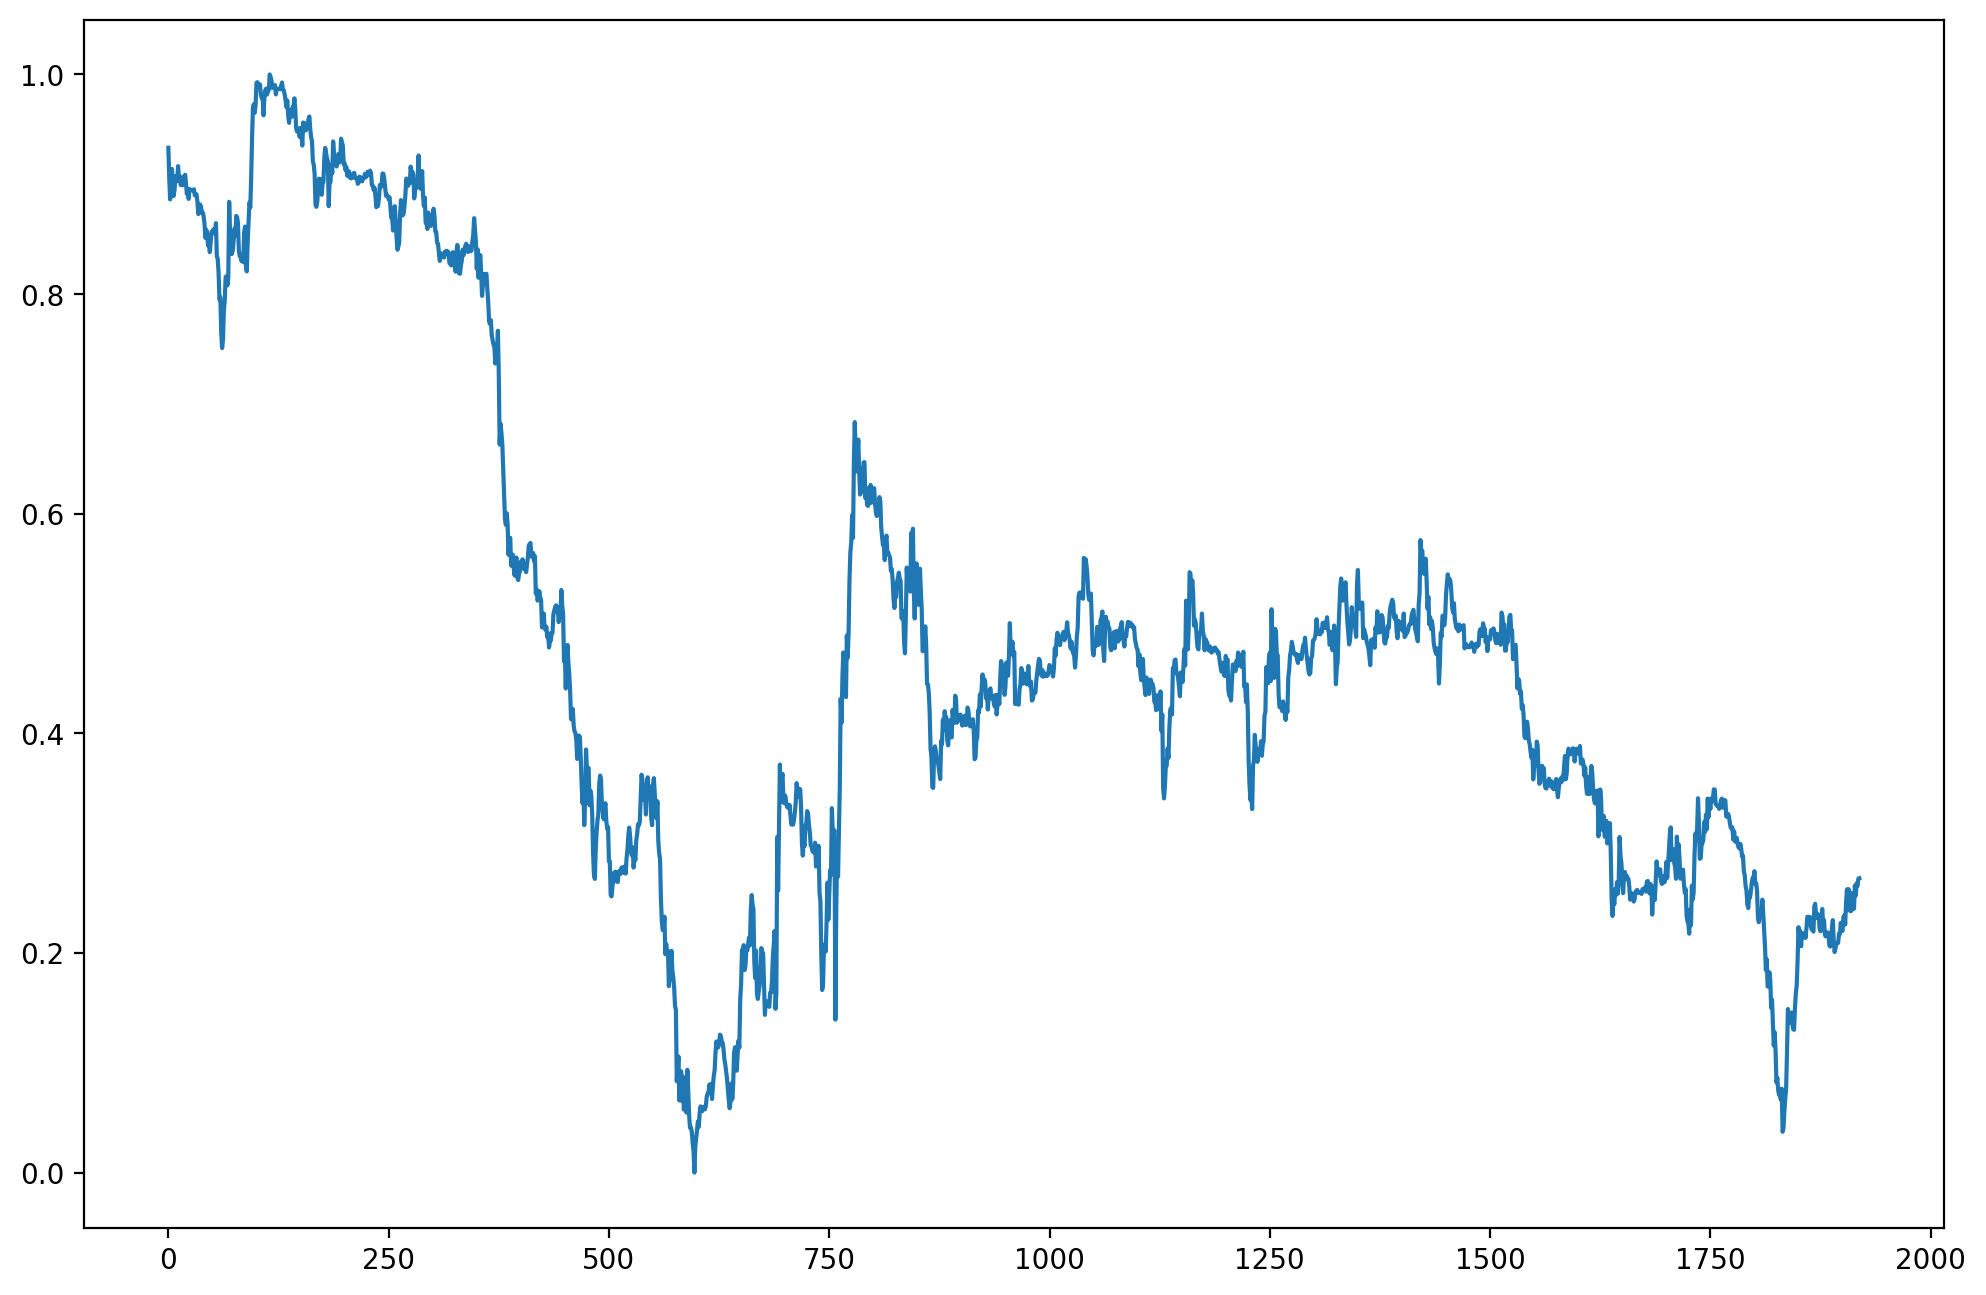

In [91]:
plt.plot(df.index, df['close'])

In [92]:
dataPointPerHour = 4
shift = dataPointPerHour * 1

In [93]:
dfTarget = df[['close']]
dfTarget.columns = ['target']
if shift > 0:
    dfTarget = dfTarget.tail(-shift)  # drop first n rows
    dfTarget = dfTarget.reset_index()
    dfTarget = dfTarget.drop(['index'], axis = 1)
dfTarget

,target
0,0.914022
1,0.902454
2,0.889323
3,0.894951
4,0.907457
...,...
1911,0.252306
1912,0.263405
1913,0.261060
1914,0.267782


In [94]:
dfInput = df
if shift > 0:
    dfInput = df.head(-shift) # drop last n rows
    dfInput = dfInput.reset_index()
    dfInput = dfInput.drop(['index'], axis = 1)
dfInput

,open,high,low,close,volume,O-H,O-L,C-H,C-L,H-L,...,Trend_MI,Trend_SMA_12,Trend_SMA_50,Trend_SMA_100,Trend_STC,Trend_TRIX,Trend_VI_vortex_indicator_diff,Trend_VI_vortex_indicator_neg,Trend_VI_vortex_indicator_pos,Trend_WMA
0,0.919443,0.938346,0.921823,0.933250,0.358587,0.135864,0.026316,0.039331,0.105403,0.135179,...,0.396472,0.930966,0.911243,0.900912,0.500001,0.405441,0.350524,0.585121,0.356167,0.930070
1,0.933677,0.935001,0.910353,0.905737,0.340074,0.023976,0.172807,0.169038,0.016829,0.179967,...,0.392739,0.928337,0.912797,0.901327,0.499888,0.398871,0.336628,0.594562,0.339685,0.927181
2,0.905678,0.906962,0.892997,0.886197,0.317358,0.026973,0.116667,0.126360,0.007972,0.130293,...,0.396413,0.924917,0.914022,0.901676,0.374775,0.388271,0.319030,0.629070,0.339623,0.921563
3,0.885969,0.901067,0.893450,0.902454,0.287553,0.115884,0.003509,0.008368,0.097431,0.097720,...,0.400487,0.924209,0.915510,0.902217,0.249691,0.378460,0.337423,0.626588,0.370681,0.919075
4,0.902550,0.914131,0.907033,0.914022,0.288997,0.091908,0.017544,0.015063,0.083260,0.091205,...,0.405252,0.922533,0.917346,0.903172,0.249303,0.371607,0.384150,0.589810,0.421463,0.918551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1911,0.238073,0.240083,0.268186,0.254651,0.312369,0.108891,0.004386,0.004184,0.096546,0.092834,...,0.516335,0.216624,0.172873,0.092403,0.237420,0.445338,0.547118,0.405179,0.546556,0.222364
1912,0.254497,0.241357,0.271204,0.241676,0.314470,0.011988,0.078947,0.080335,0.005314,0.083062,...,0.522467,0.218504,0.173065,0.092827,0.118710,0.446159,0.542579,0.418515,0.550634,0.222516
1913,0.241201,0.229568,0.263507,0.240269,0.225972,0.022977,0.049123,0.025941,0.042516,0.064332,...,0.526402,0.219172,0.173230,0.093491,0.059355,0.445397,0.502045,0.469990,0.524644,0.222155
1914,0.239950,0.263183,0.264866,0.261373,0.362001,0.241758,0.034211,0.089540,0.154119,0.228827,...,0.541974,0.221529,0.174036,0.094286,0.029678,0.446954,0.561940,0.357124,0.529082,0.225075


In [95]:
def windowed_df_to_date_X_y(df_input, df_target):
  middle_matrix = df_input.to_numpy()
  X = middle_matrix.reshape((len(df_input), middle_matrix.shape[1], 1))
  Y = df_target.to_numpy()

  return X.astype(np.float32), Y.astype(np.float32)

In [96]:
index = pd.DataFrame(df.index)
if shift > 0:
    index = index.head(-shift)

X, y = windowed_df_to_date_X_y(dfInput, dfTarget)

index.shape, X.shape, y.shape

((1916, 1), (1916, 86, 1), (1916, 1))

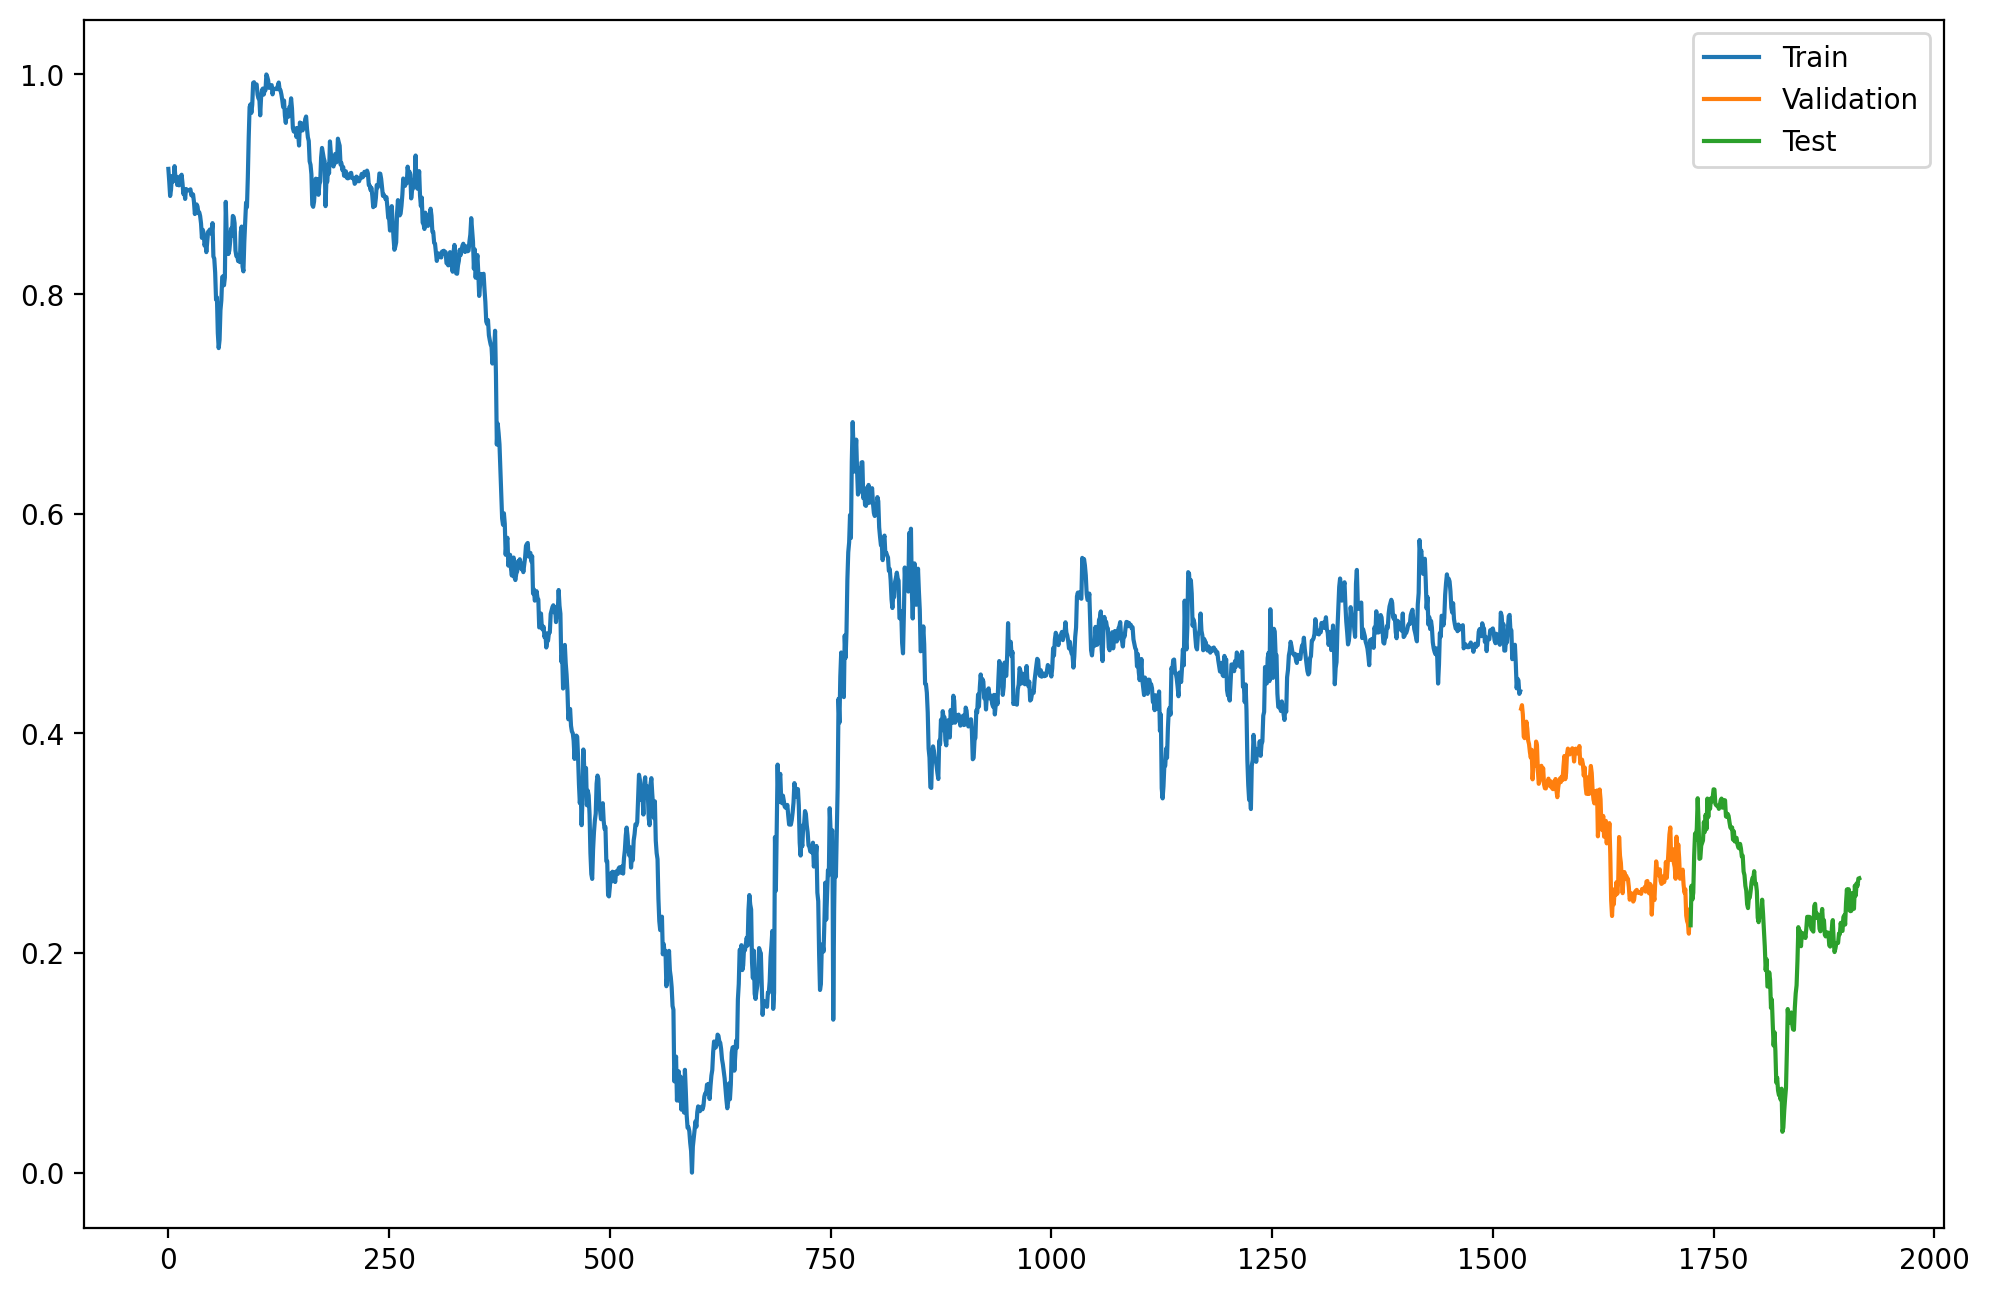

In [97]:
q_80 = int(len(index) * .8)
q_90 = int(len(index) * .9)

index_train, X_train, y_train = index[:q_80], X[:q_80], y[:q_80]
index_val, X_val, y_val       = index[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
index_test, X_test, y_test    = index[q_90:], X[q_90:], y[q_90:]

plt.plot(index_train, y_train)
plt.plot(index_val, y_val)
plt.plot(index_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [98]:
tf.random.set_seed(1)
PATIENCE = 10

model = tf.keras.models.Sequential([
                    tf.keras.layers.Input((X.shape[1], X.shape[2])),
                    tf.keras.layers.Bidirectional(
                        tf.keras.layers.LSTM(1024)
                    ),
                    tf.keras.layers.Dense(32, activation='relu'),
                    tf.keras.layers.Dense(16, activation='relu'),
                    tf.keras.layers.Dropout(rate=0.2),
                    tf.keras.layers.Dense(1)])

cp = tf.keras.callbacks.ModelCheckpoint(MODEL_PATH, save_best_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=PATIENCE,
                                                  mode='min')

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError()])





model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 2048)             8404992   
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 32)                65568     
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 8,471,105
Trainable params: 8,471,105
Non-trainable params: 0
____________________________________________

In [99]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1000000, callbacks=[cp, early_stopping])

Epoch 1/1000000
46/48 [===========================>..] - ETA: 0s - loss: 0.0736 - mean_absolute_error: 0.2028

INFO:tensorflow:Assets written to: /ScalpFX/src\model\assets


INFO:tensorflow:Assets written to: /ScalpFX/src\model\assets


48/48 [==============================] - 17s 297ms/step - loss: 0.0717 - mean_absolute_error: 0.1999 - val_loss: 0.0110 - val_mean_absolute_error: 0.0982
Epoch 2/1000000
47/48 [============================>.] - ETA: 0s - loss: 0.0216 - mean_absolute_error: 0.1113

INFO:tensorflow:Assets written to: /ScalpFX/src\model\assets


INFO:tensorflow:Assets written to: /ScalpFX/src\model\assets


48/48 [==============================] - 15s 304ms/step - loss: 0.0223 - mean_absolute_error: 0.1124 - val_loss: 0.0014 - val_mean_absolute_error: 0.0311
Epoch 3/1000000
48/48 [==============================] - 1s 23ms/step - loss: 0.0240 - mean_absolute_error: 0.1173 - val_loss: 0.0015 - val_mean_absolute_error: 0.0310
Epoch 4/1000000
48/48 [==============================] - 1s 23ms/step - loss: 0.0159 - mean_absolute_error: 0.0941 - val_loss: 0.0021 - val_mean_absolute_error: 0.0370
Epoch 5/1000000
46/48 [===========================>..] - ETA: 0s - loss: 0.0153 - mean_absolute_error: 0.0930

INFO:tensorflow:Assets written to: /ScalpFX/src\model\assets


INFO:tensorflow:Assets written to: /ScalpFX/src\model\assets


48/48 [==============================] - 14s 292ms/step - loss: 0.0151 - mean_absolute_error: 0.0925 - val_loss: 0.0013 - val_mean_absolute_error: 0.0280
Epoch 6/1000000
48/48 [==============================] - 1s 23ms/step - loss: 0.0139 - mean_absolute_error: 0.0890 - val_loss: 0.0014 - val_mean_absolute_error: 0.0292
Epoch 7/1000000
48/48 [==============================] - 1s 23ms/step - loss: 0.0147 - mean_absolute_error: 0.0903 - val_loss: 0.0015 - val_mean_absolute_error: 0.0310
Epoch 8/1000000
47/48 [============================>.] - ETA: 0s - loss: 0.0136 - mean_absolute_error: 0.0877

INFO:tensorflow:Assets written to: /ScalpFX/src\model\assets


INFO:tensorflow:Assets written to: /ScalpFX/src\model\assets


48/48 [==============================] - 14s 300ms/step - loss: 0.0135 - mean_absolute_error: 0.0878 - val_loss: 9.9172e-04 - val_mean_absolute_error: 0.0243
Epoch 9/1000000
46/48 [===========================>..] - ETA: 0s - loss: 0.0125 - mean_absolute_error: 0.0833

INFO:tensorflow:Assets written to: /ScalpFX/src\model\assets


INFO:tensorflow:Assets written to: /ScalpFX/src\model\assets


48/48 [==============================] - 14s 291ms/step - loss: 0.0125 - mean_absolute_error: 0.0832 - val_loss: 8.9867e-04 - val_mean_absolute_error: 0.0239
Epoch 10/1000000
48/48 [==============================] - 1s 24ms/step - loss: 0.0126 - mean_absolute_error: 0.0844 - val_loss: 0.0015 - val_mean_absolute_error: 0.0315
Epoch 11/1000000
48/48 [==============================] - 1s 23ms/step - loss: 0.0125 - mean_absolute_error: 0.0841 - val_loss: 0.0010 - val_mean_absolute_error: 0.0248
Epoch 12/1000000
46/48 [===========================>..] - ETA: 0s - loss: 0.0109 - mean_absolute_error: 0.0788

INFO:tensorflow:Assets written to: /ScalpFX/src\model\assets


INFO:tensorflow:Assets written to: /ScalpFX/src\model\assets


48/48 [==============================] - 14s 304ms/step - loss: 0.0109 - mean_absolute_error: 0.0786 - val_loss: 8.1756e-04 - val_mean_absolute_error: 0.0228
Epoch 13/1000000
46/48 [===========================>..] - ETA: 0s - loss: 0.0110 - mean_absolute_error: 0.0794

INFO:tensorflow:Assets written to: /ScalpFX/src\model\assets


INFO:tensorflow:Assets written to: /ScalpFX/src\model\assets


48/48 [==============================] - 13s 265ms/step - loss: 0.0107 - mean_absolute_error: 0.0782 - val_loss: 8.1367e-04 - val_mean_absolute_error: 0.0232
Epoch 14/1000000
48/48 [==============================] - 2s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0800 - val_loss: 9.1508e-04 - val_mean_absolute_error: 0.0232
Epoch 15/1000000
48/48 [==============================] - 1s 24ms/step - loss: 0.0125 - mean_absolute_error: 0.0836 - val_loss: 0.0010 - val_mean_absolute_error: 0.0264
Epoch 16/1000000
46/48 [===========================>..] - ETA: 0s - loss: 0.0114 - mean_absolute_error: 0.0811

INFO:tensorflow:Assets written to: /ScalpFX/src\model\assets


INFO:tensorflow:Assets written to: /ScalpFX/src\model\assets


48/48 [==============================] - 14s 307ms/step - loss: 0.0115 - mean_absolute_error: 0.0812 - val_loss: 7.3835e-04 - val_mean_absolute_error: 0.0215
Epoch 17/1000000
48/48 [==============================] - 1s 23ms/step - loss: 0.0116 - mean_absolute_error: 0.0799 - val_loss: 0.0013 - val_mean_absolute_error: 0.0299
Epoch 18/1000000
46/48 [===========================>..] - ETA: 0s - loss: 0.0121 - mean_absolute_error: 0.0824

INFO:tensorflow:Assets written to: /ScalpFX/src\model\assets


INFO:tensorflow:Assets written to: /ScalpFX/src\model\assets


48/48 [==============================] - 13s 285ms/step - loss: 0.0121 - mean_absolute_error: 0.0820 - val_loss: 7.2600e-04 - val_mean_absolute_error: 0.0211
Epoch 19/1000000
48/48 [==============================] - 1s 22ms/step - loss: 0.0115 - mean_absolute_error: 0.0783 - val_loss: 9.3421e-04 - val_mean_absolute_error: 0.0246
Epoch 20/1000000
48/48 [==============================] - 1s 24ms/step - loss: 0.0107 - mean_absolute_error: 0.0784 - val_loss: 8.1710e-04 - val_mean_absolute_error: 0.0234
Epoch 21/1000000
48/48 [==============================] - 1s 23ms/step - loss: 0.0126 - mean_absolute_error: 0.0828 - val_loss: 0.0012 - val_mean_absolute_error: 0.0288
Epoch 22/1000000
48/48 [==============================] - 1s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0779 - val_loss: 9.1534e-04 - val_mean_absolute_error: 0.0247
Epoch 23/1000000
48/48 [==============================] - 1s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0794 - val_loss: 7.8179e-04 - val_mean_abso

INFO:tensorflow:Assets written to: /ScalpFX/src\model\assets


INFO:tensorflow:Assets written to: /ScalpFX/src\model\assets


48/48 [==============================] - 14s 307ms/step - loss: 0.0099 - mean_absolute_error: 0.0753 - val_loss: 6.4486e-04 - val_mean_absolute_error: 0.0201
Epoch 26/1000000
48/48 [==============================] - 1s 23ms/step - loss: 0.0112 - mean_absolute_error: 0.0770 - val_loss: 0.0011 - val_mean_absolute_error: 0.0279
Epoch 27/1000000
48/48 [==============================] - 1s 23ms/step - loss: 0.0111 - mean_absolute_error: 0.0778 - val_loss: 9.1023e-04 - val_mean_absolute_error: 0.0245
Epoch 28/1000000
48/48 [==============================] - 1s 23ms/step - loss: 0.0099 - mean_absolute_error: 0.0741 - val_loss: 8.0226e-04 - val_mean_absolute_error: 0.0227
Epoch 29/1000000
48/48 [==============================] - 1s 22ms/step - loss: 0.0101 - mean_absolute_error: 0.0757 - val_loss: 7.2190e-04 - val_mean_absolute_error: 0.0217
Epoch 30/1000000
48/48 [==============================] - 1s 23ms/step - loss: 0.0110 - mean_absolute_error: 0.0777 - val_loss: 6.5523e-04 - val_mean_abso

INFO:tensorflow:Assets written to: /ScalpFX/src\model\assets


INFO:tensorflow:Assets written to: /ScalpFX/src\model\assets


48/48 [==============================] - 13s 280ms/step - loss: 0.0106 - mean_absolute_error: 0.0768 - val_loss: 6.0633e-04 - val_mean_absolute_error: 0.0193
Epoch 36/1000000
46/48 [===========================>..] - ETA: 0s - loss: 0.0101 - mean_absolute_error: 0.0747

INFO:tensorflow:Assets written to: /ScalpFX/src\model\assets


INFO:tensorflow:Assets written to: /ScalpFX/src\model\assets


48/48 [==============================] - 14s 304ms/step - loss: 0.0100 - mean_absolute_error: 0.0745 - val_loss: 5.4719e-04 - val_mean_absolute_error: 0.0180
Epoch 37/1000000
48/48 [==============================] - 1s 24ms/step - loss: 0.0105 - mean_absolute_error: 0.0754 - val_loss: 6.5035e-04 - val_mean_absolute_error: 0.0198
Epoch 38/1000000
48/48 [==============================] - 1s 23ms/step - loss: 0.0098 - mean_absolute_error: 0.0745 - val_loss: 7.4900e-04 - val_mean_absolute_error: 0.0214
Epoch 39/1000000
48/48 [==============================] - 1s 23ms/step - loss: 0.0096 - mean_absolute_error: 0.0715 - val_loss: 5.9297e-04 - val_mean_absolute_error: 0.0195
Epoch 40/1000000
48/48 [==============================] - 1s 25ms/step - loss: 0.0094 - mean_absolute_error: 0.0733 - val_loss: 5.6092e-04 - val_mean_absolute_error: 0.0193
Epoch 41/1000000
48/48 [==============================] - 1s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0736 - val_loss: 5.4859e-04 - val_mean_

INFO:tensorflow:Assets written to: /ScalpFX/src\model\assets


INFO:tensorflow:Assets written to: /ScalpFX/src\model\assets


48/48 [==============================] - 13s 281ms/step - loss: 0.0096 - mean_absolute_error: 0.0716 - val_loss: 5.4002e-04 - val_mean_absolute_error: 0.0174
Epoch 43/1000000
47/48 [============================>.] - ETA: 0s - loss: 0.0092 - mean_absolute_error: 0.0728

INFO:tensorflow:Assets written to: /ScalpFX/src\model\assets


INFO:tensorflow:Assets written to: /ScalpFX/src\model\assets


48/48 [==============================] - 14s 299ms/step - loss: 0.0091 - mean_absolute_error: 0.0725 - val_loss: 4.7573e-04 - val_mean_absolute_error: 0.0161
Epoch 44/1000000
48/48 [==============================] - 2s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0703 - val_loss: 5.8996e-04 - val_mean_absolute_error: 0.0202
Epoch 45/1000000
47/48 [============================>.] - ETA: 0s - loss: 0.0100 - mean_absolute_error: 0.0736

INFO:tensorflow:Assets written to: /ScalpFX/src\model\assets


INFO:tensorflow:Assets written to: /ScalpFX/src\model\assets


48/48 [==============================] - 14s 306ms/step - loss: 0.0099 - mean_absolute_error: 0.0732 - val_loss: 4.3847e-04 - val_mean_absolute_error: 0.0155
Epoch 46/1000000
48/48 [==============================] - 1s 24ms/step - loss: 0.0092 - mean_absolute_error: 0.0715 - val_loss: 4.4052e-04 - val_mean_absolute_error: 0.0161
Epoch 47/1000000
48/48 [==============================] - 1s 24ms/step - loss: 0.0100 - mean_absolute_error: 0.0733 - val_loss: 4.4610e-04 - val_mean_absolute_error: 0.0162
Epoch 48/1000000
48/48 [==============================] - 1s 23ms/step - loss: 0.0085 - mean_absolute_error: 0.0697 - val_loss: 0.0011 - val_mean_absolute_error: 0.0291
Epoch 49/1000000
48/48 [==============================] - 1s 23ms/step - loss: 0.0099 - mean_absolute_error: 0.0729 - val_loss: 6.0634e-04 - val_mean_absolute_error: 0.0189
Epoch 50/1000000
48/48 [==============================] - 1s 22ms/step - loss: 0.0084 - mean_absolute_error: 0.0687 - val_loss: 4.4746e-04 - val_mean_abso

INFO:tensorflow:Assets written to: /ScalpFX/src\model\assets


INFO:tensorflow:Assets written to: /ScalpFX/src\model\assets


48/48 [==============================] - 14s 300ms/step - loss: 0.0084 - mean_absolute_error: 0.0686 - val_loss: 4.2168e-04 - val_mean_absolute_error: 0.0159
Epoch 54/1000000
48/48 [==============================] - 1s 23ms/step - loss: 0.0089 - mean_absolute_error: 0.0689 - val_loss: 4.5198e-04 - val_mean_absolute_error: 0.0165
Epoch 55/1000000
46/48 [===========================>..] - ETA: 0s - loss: 0.0085 - mean_absolute_error: 0.0685

INFO:tensorflow:Assets written to: /ScalpFX/src\model\assets


INFO:tensorflow:Assets written to: /ScalpFX/src\model\assets


48/48 [==============================] - 14s 295ms/step - loss: 0.0084 - mean_absolute_error: 0.0682 - val_loss: 3.7502e-04 - val_mean_absolute_error: 0.0144
Epoch 56/1000000
48/48 [==============================] - 1s 24ms/step - loss: 0.0088 - mean_absolute_error: 0.0700 - val_loss: 6.3982e-04 - val_mean_absolute_error: 0.0209
Epoch 57/1000000
48/48 [==============================] - 1s 24ms/step - loss: 0.0086 - mean_absolute_error: 0.0683 - val_loss: 4.9960e-04 - val_mean_absolute_error: 0.0167
Epoch 58/1000000
48/48 [==============================] - 1s 23ms/step - loss: 0.0085 - mean_absolute_error: 0.0692 - val_loss: 6.5198e-04 - val_mean_absolute_error: 0.0209
Epoch 59/1000000
48/48 [==============================] - 1s 23ms/step - loss: 0.0088 - mean_absolute_error: 0.0702 - val_loss: 4.0980e-04 - val_mean_absolute_error: 0.0151
Epoch 60/1000000
48/48 [==============================] - 1s 23ms/step - loss: 0.0092 - mean_absolute_error: 0.0709 - val_loss: 0.0012 - val_mean_abso

48/48 [==============================] - 1s 8ms/step
(1532, 1)
(1532,)
(1532, 1)
(1536, 1)
(1536,)
(1536,)


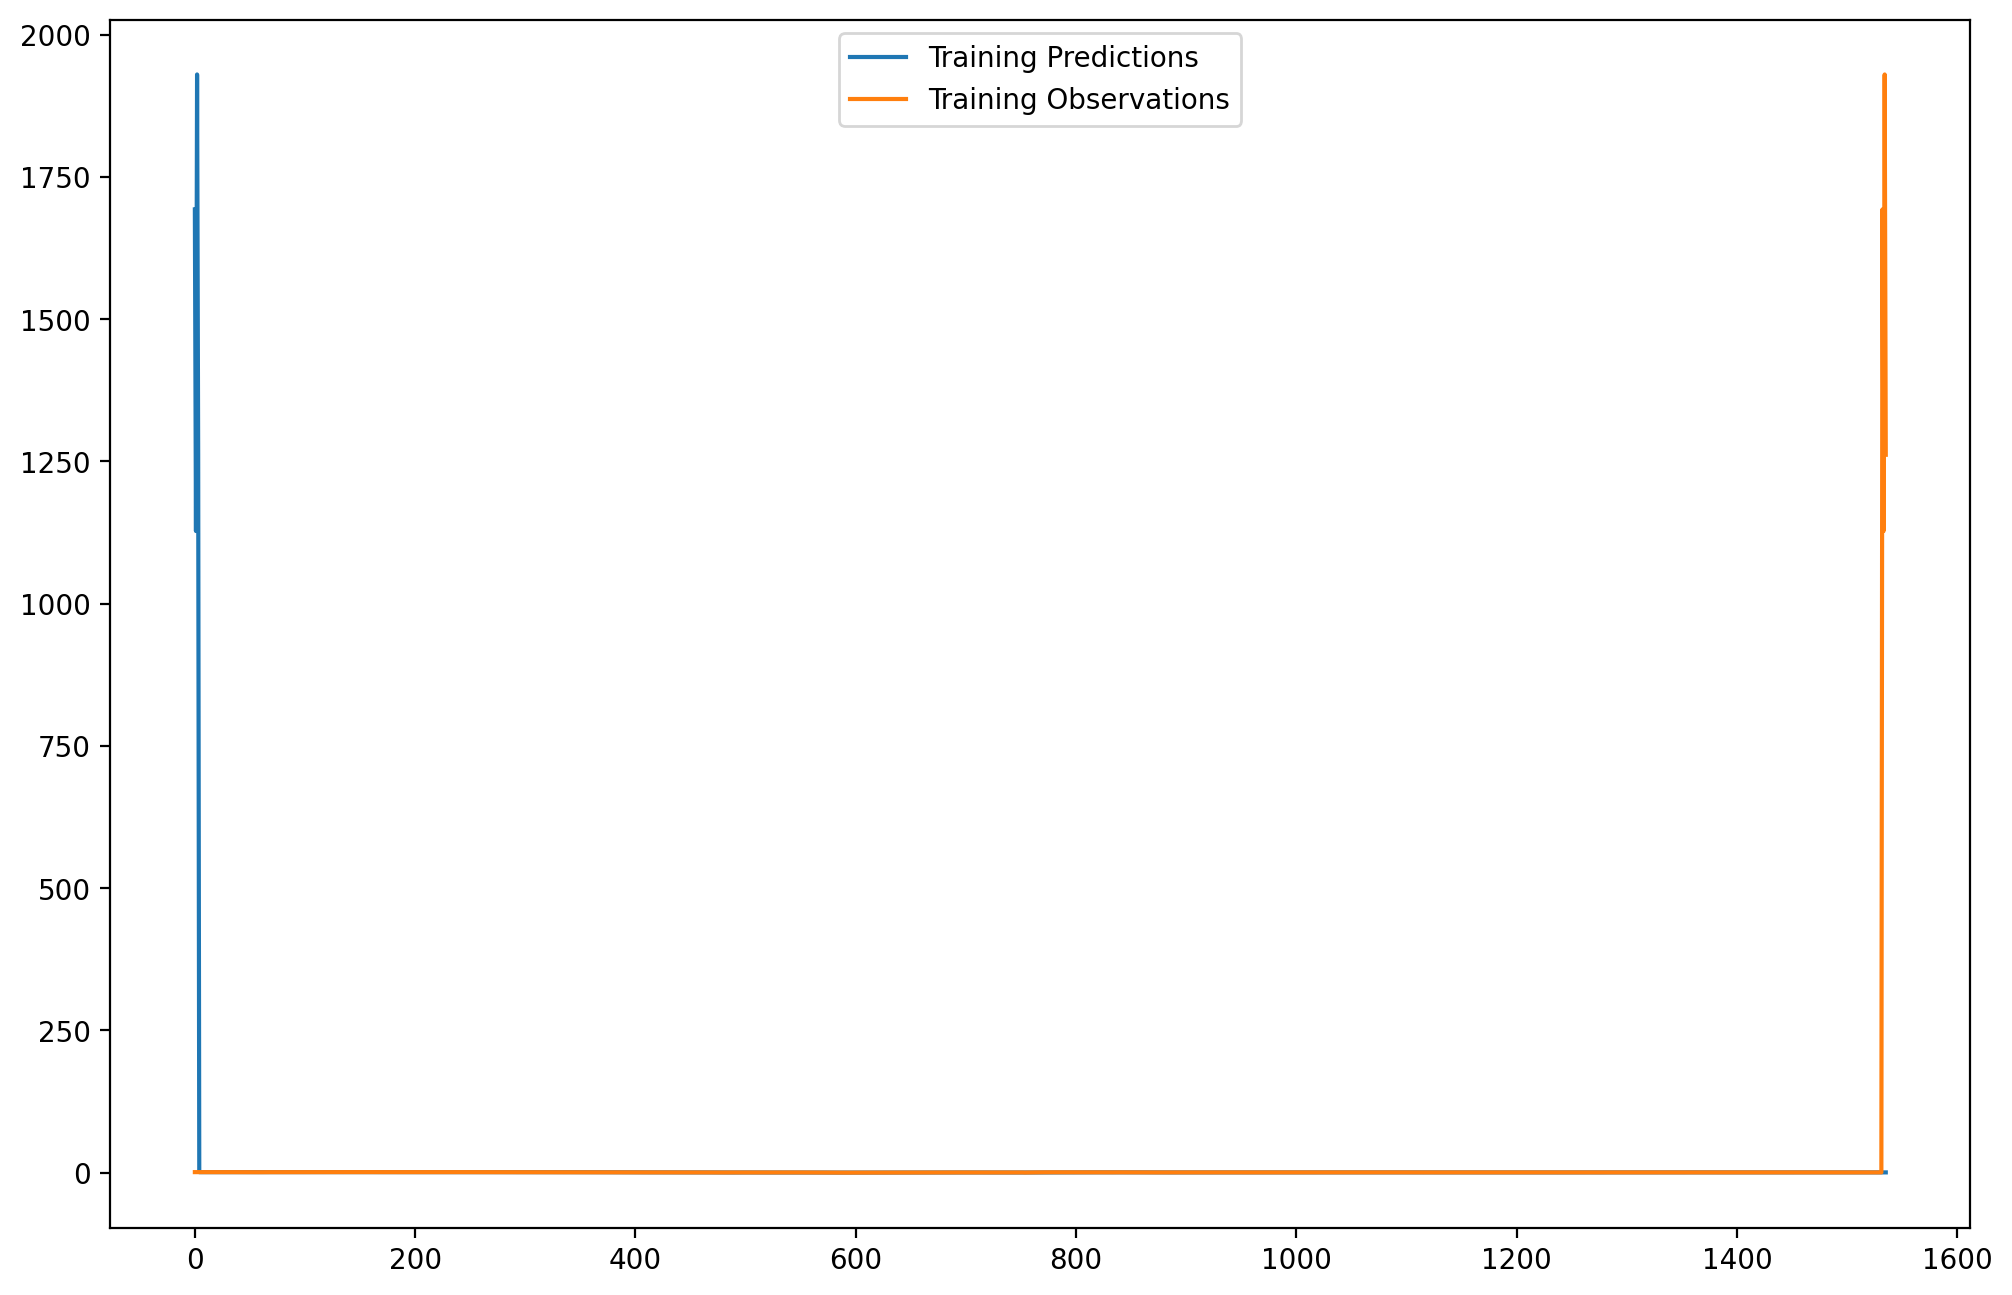

In [100]:
train_predictions = model.predict(X_train).flatten()

print(index_train.shape)
print(train_predictions.shape)
print(y_train.shape)

arr = np.empty((1, shift))
_train_predictions = np.append(arr, train_predictions)
_y_train = np.append(y_train, arr)
_index_train = index[:q_80+shift]
print(_index_train.shape)
print(_train_predictions.shape)
print(_y_train.shape)

plt.plot(_index_train, _train_predictions)
plt.plot(_index_train, _y_train)
plt.legend(['Training Predictions', 'Training Observations'])

6/6 [==============================] - 0s 8ms/step
(1532, 1)
(1532,)
(1532, 1)
(1536, 1)
(1536,)
(1536,)


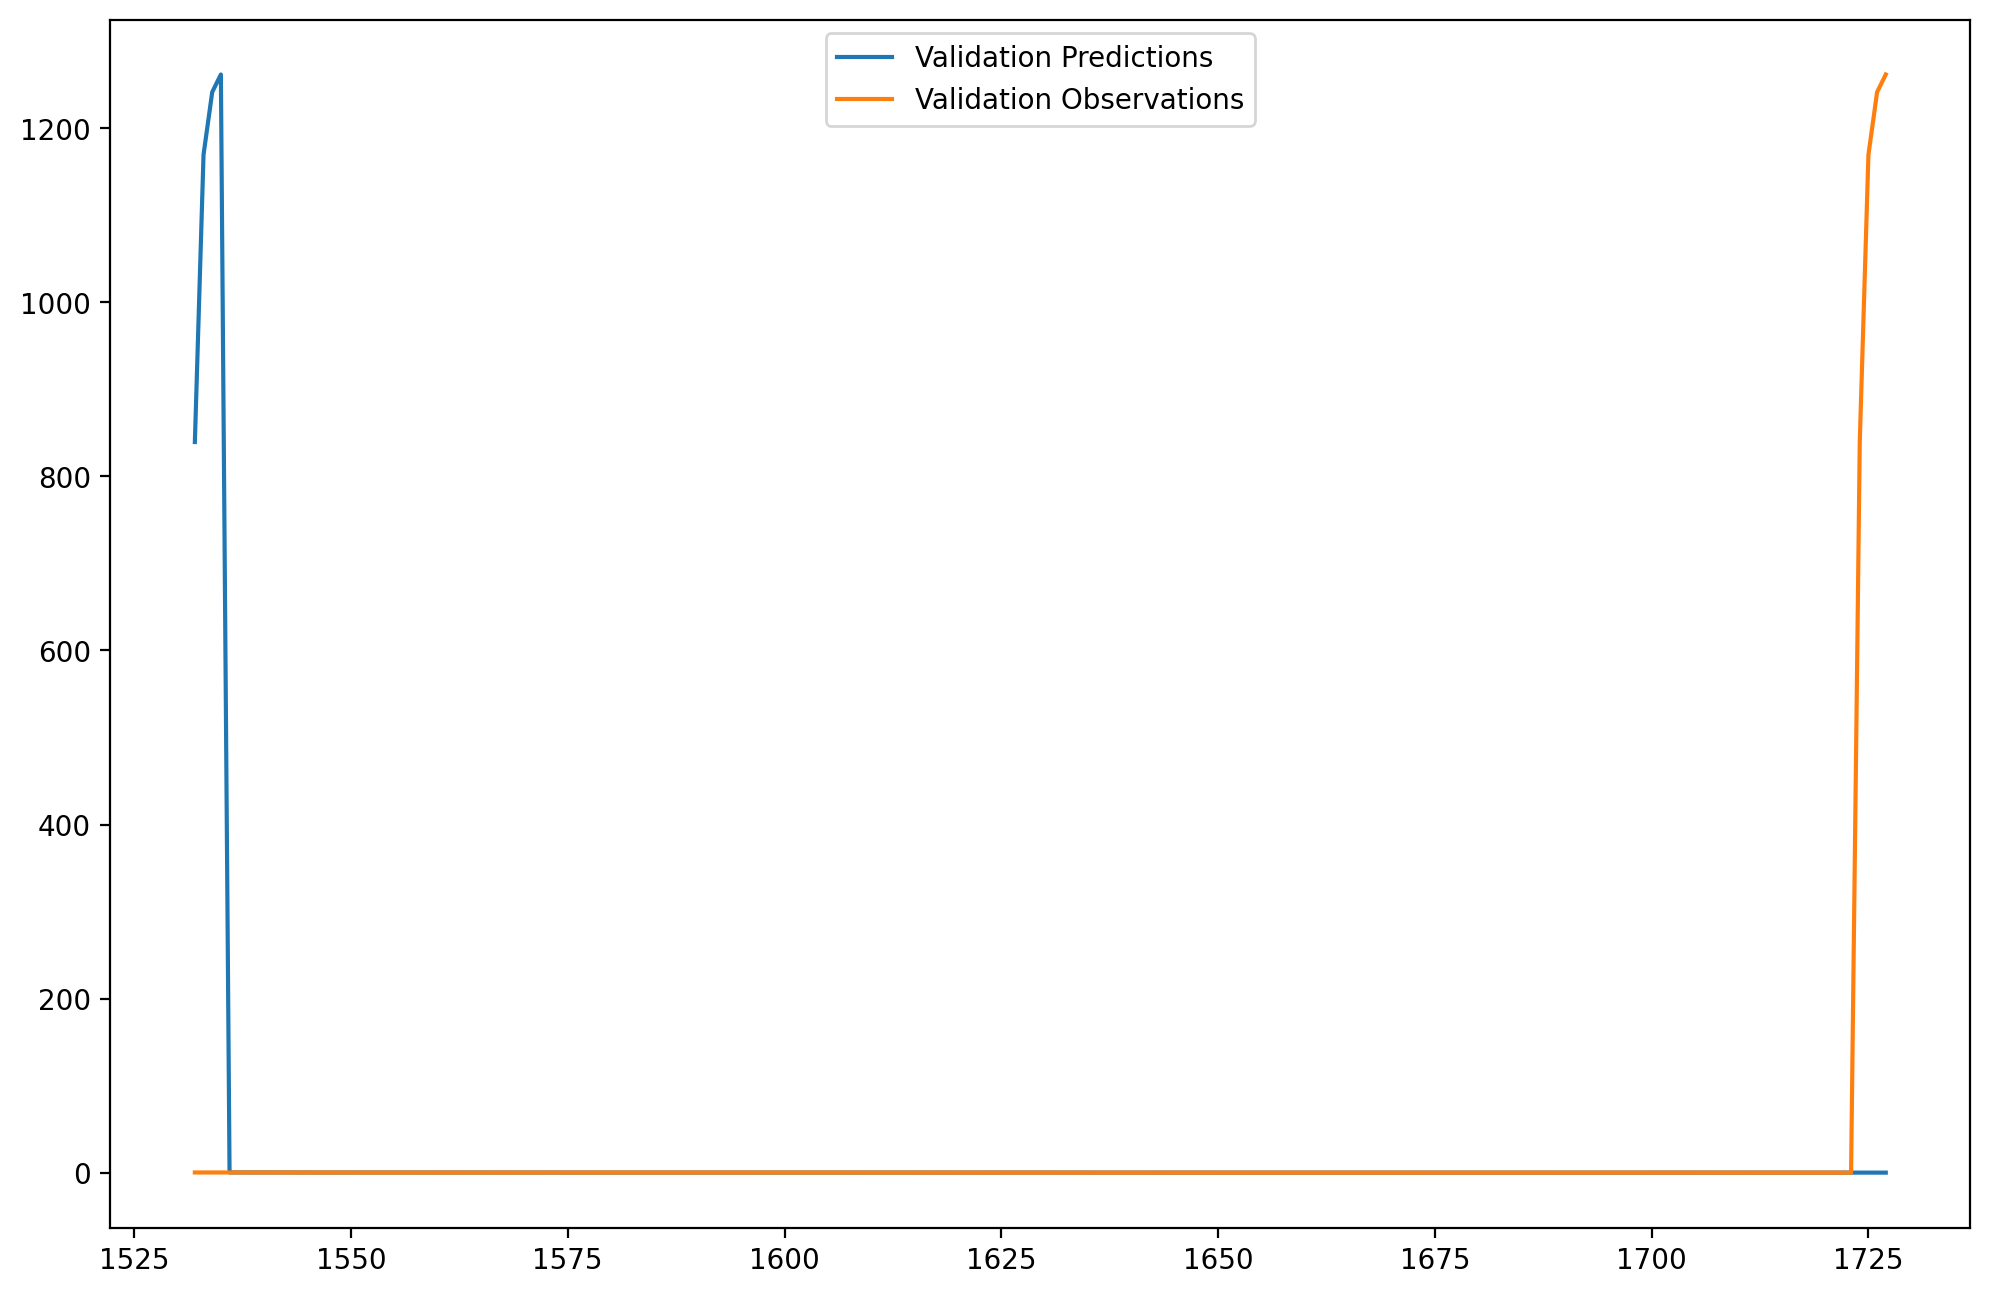

In [101]:
val_predictions = model.predict(X_val).flatten()

print(index_train.shape)
print(train_predictions.shape)
print(y_train.shape)

arr = np.empty((1, shift))
_val_predictions = np.append(arr, val_predictions)
_y_val = np.append(y_val, arr)
_index_val = index[q_80:q_90+shift]
print(_index_train.shape)
print(_train_predictions.shape)
print(_y_train.shape)

plt.plot(_index_val, _val_predictions)
plt.plot(_index_val, _y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

6/6 [==============================] - 0s 8ms/step
(192, 1)
(192,)
(192, 1)
(196, 1)
(196,)
(196,)


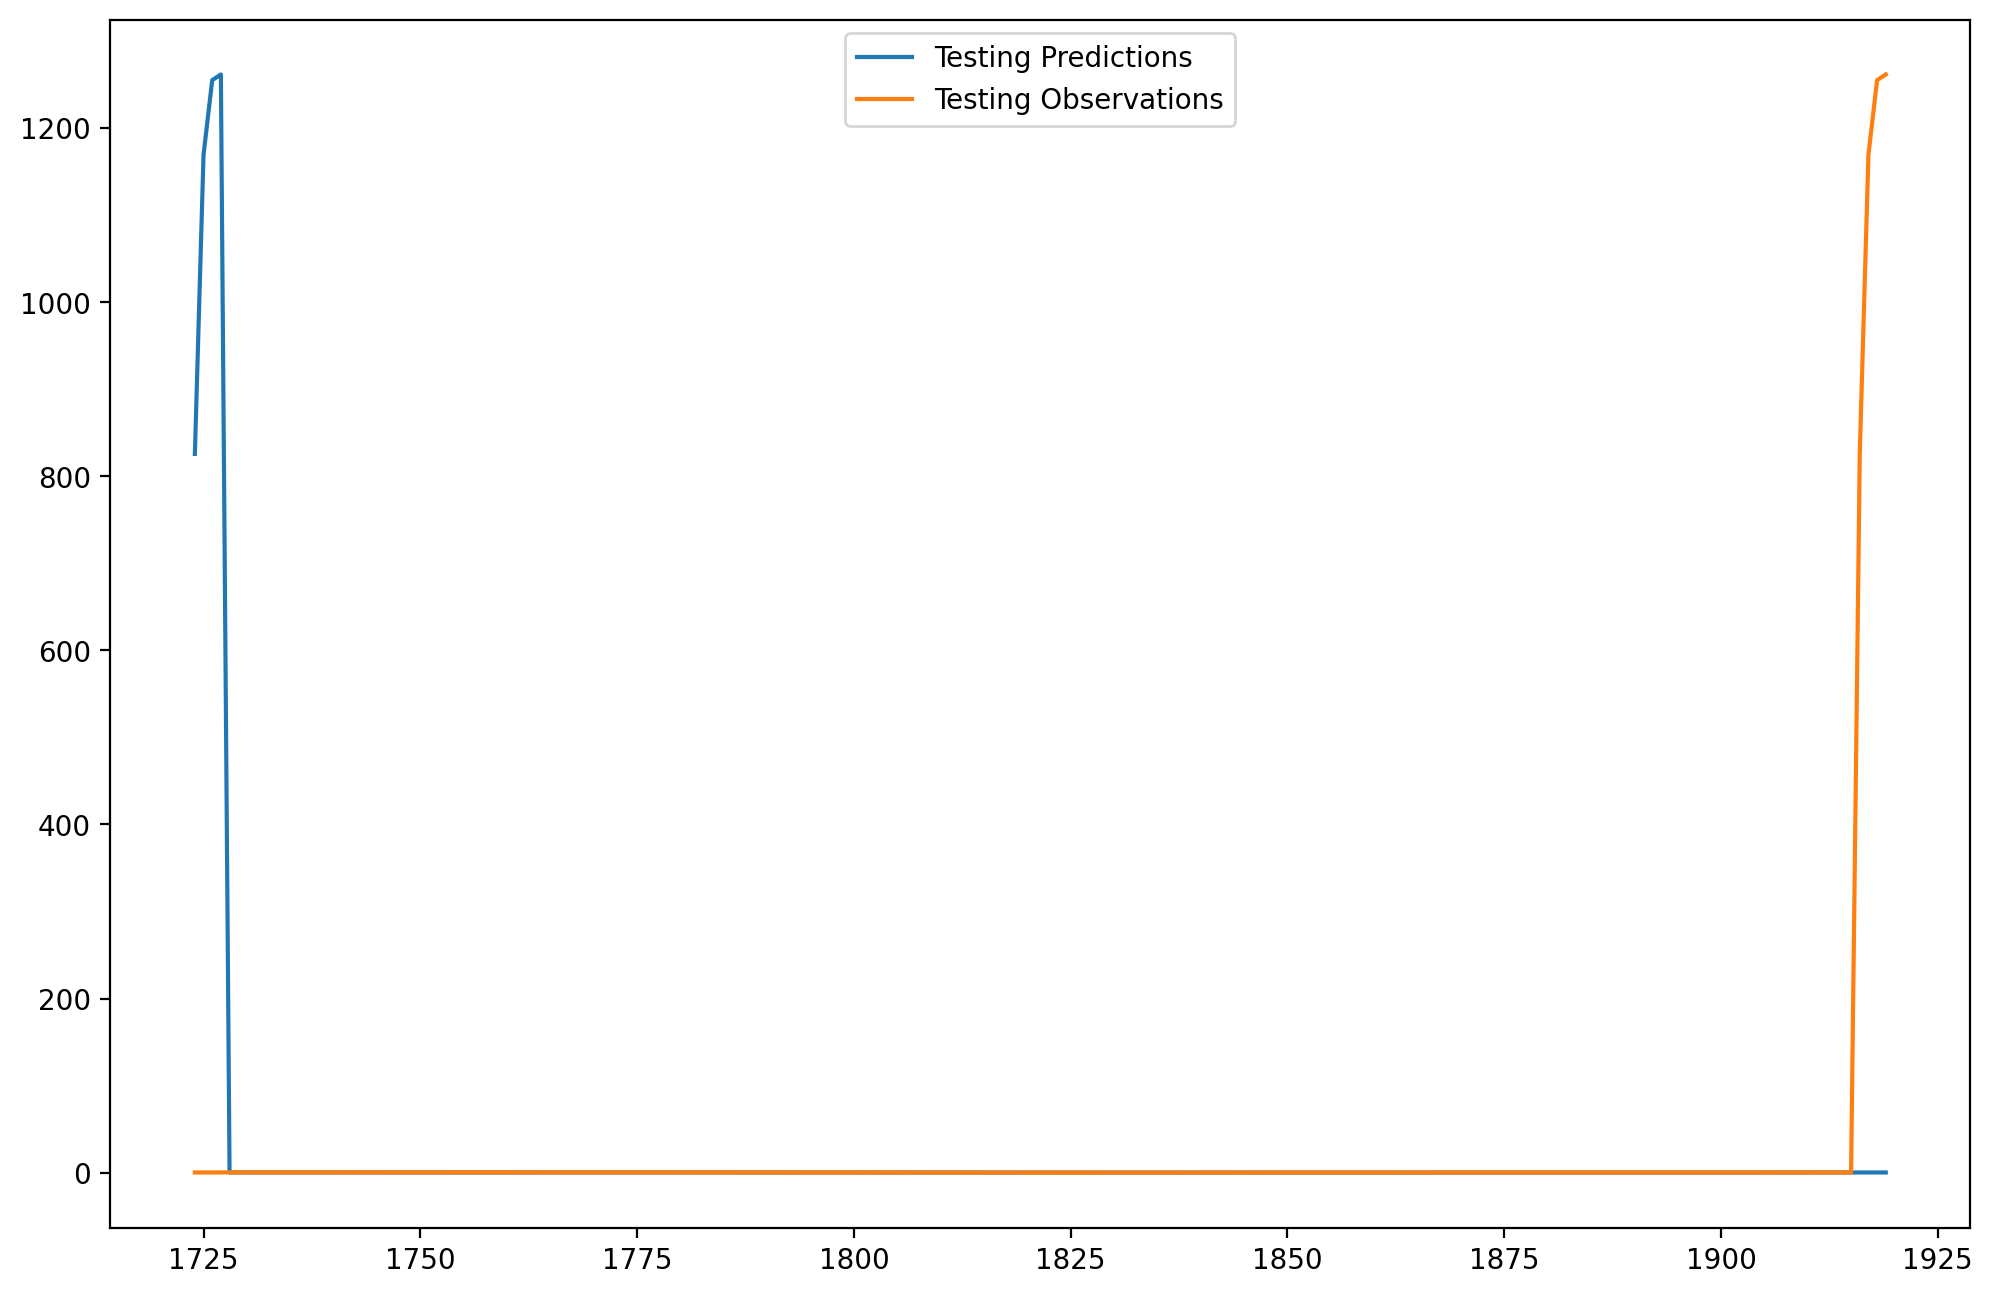

In [102]:
test_predictions = model.predict(X_test).flatten()

print(index_test.shape)
print(test_predictions.shape)
print(y_test.shape)

arr = np.empty((1, shift))
_test_predictions = np.append(arr, test_predictions)
_y_test = np.append(y_test, arr)

_index = index.copy()
for i in range(shift):
    df_new_line = pd.DataFrame([(_index[0].iloc[-1] + 1)], columns=[0])
    _index = pd.concat([_index, df_new_line], ignore_index=True)
    
_index_test = _index[q_90:]

print(_index_test.shape)
print(_test_predictions.shape)
print(_y_test.shape)

plt.plot(_index_test, _test_predictions)
plt.plot(_index_test, _y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

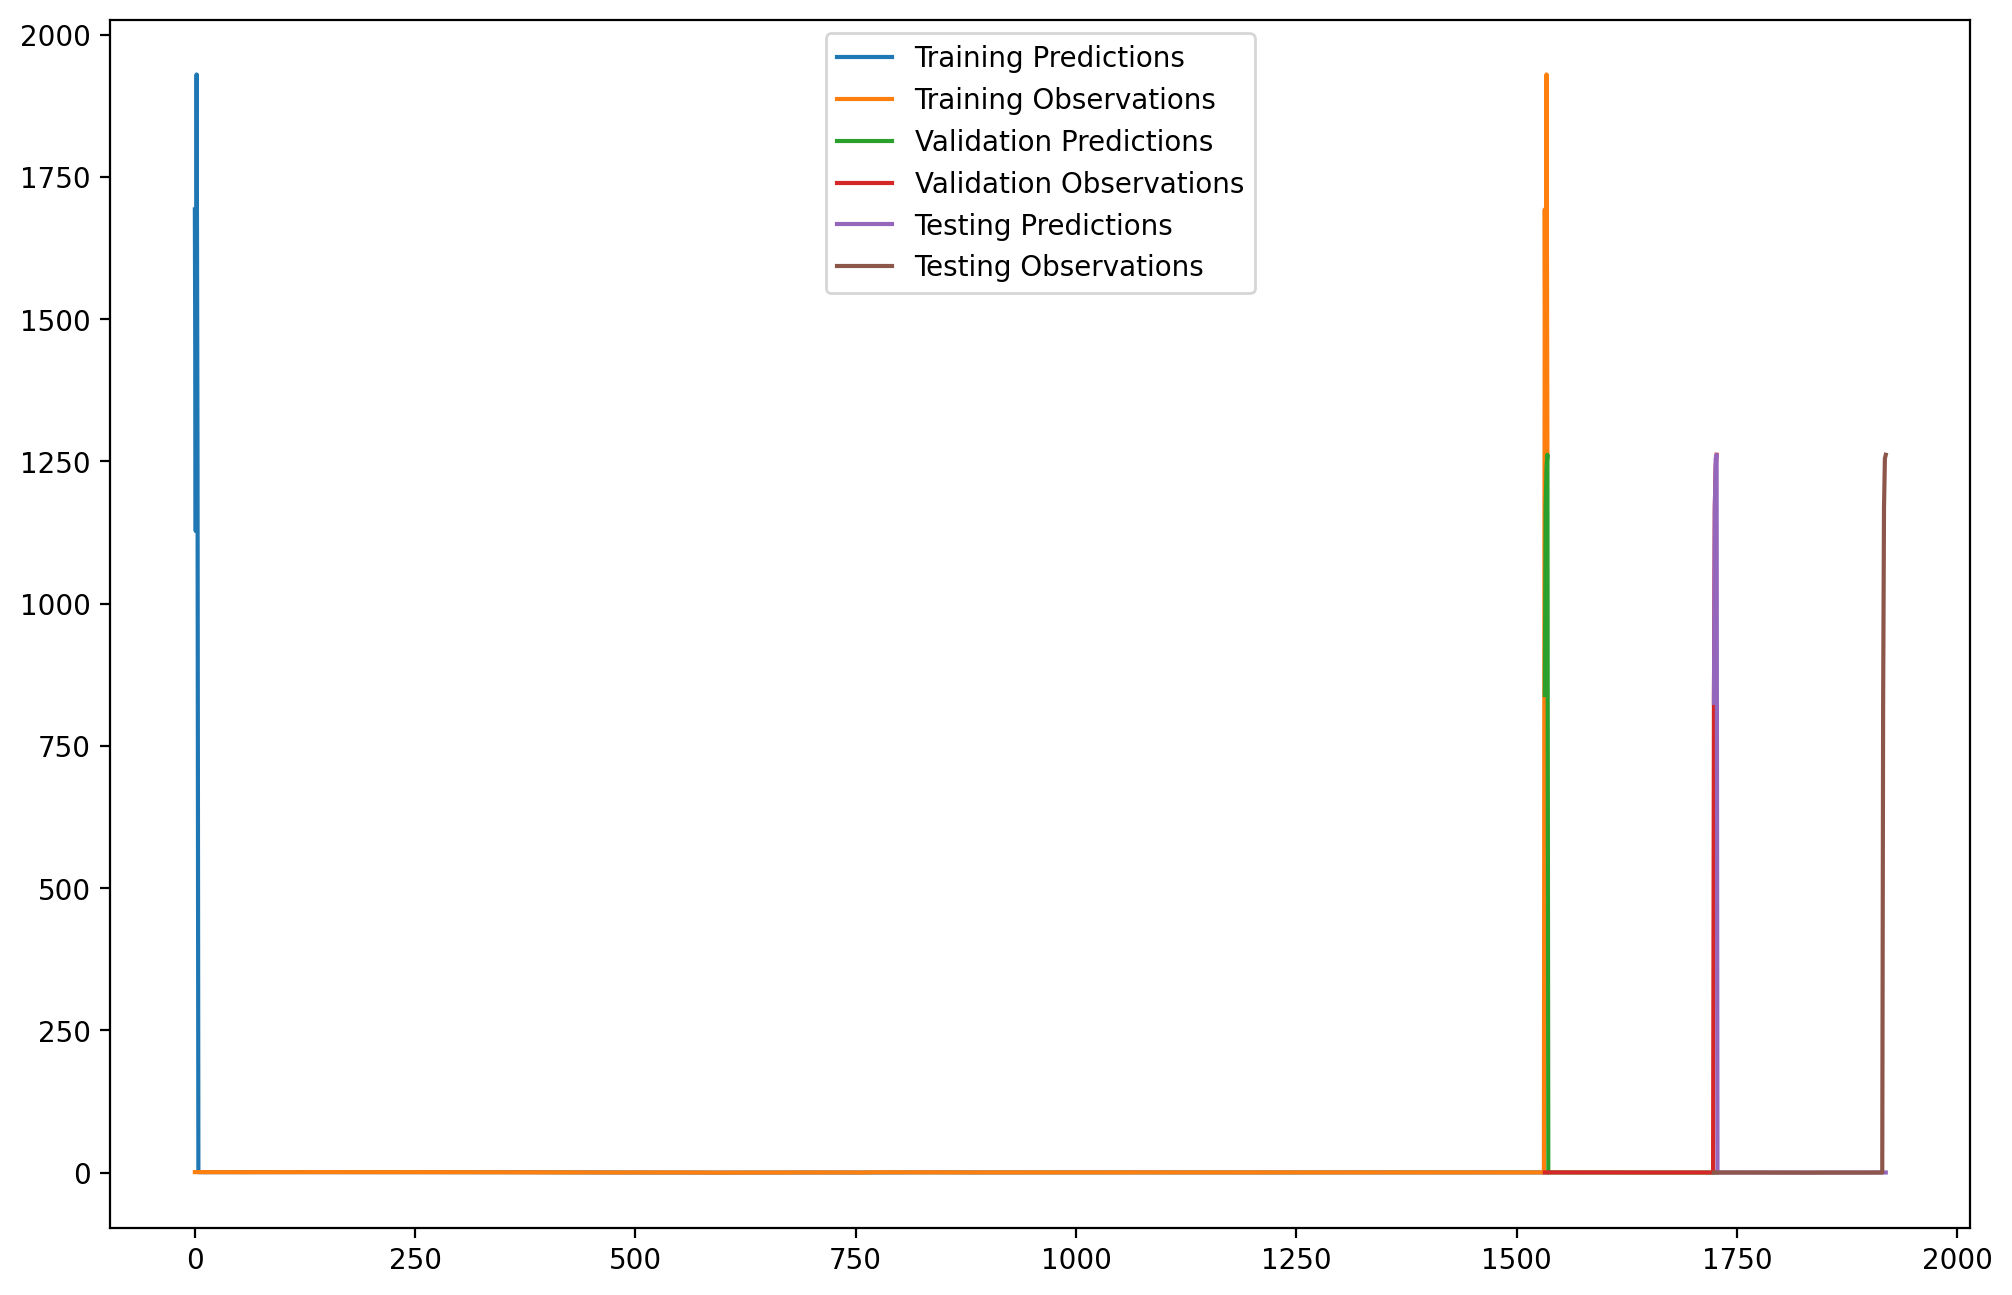

In [103]:
plt.plot(_index_train, _train_predictions)
plt.plot(_index_train, _y_train)
plt.plot(_index_val, _val_predictions)
plt.plot(_index_val, _y_val)
plt.plot(_index_test, _test_predictions)
plt.plot(_index_test, _y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [104]:
_test_predictions

array([8.25631944e+02, 1.16944444e+03, 1.25500694e+03, 1.26155556e+03,
       2.24477410e-01, 2.25686356e-01, 2.11729944e-01, 2.14633912e-01,
       2.20144182e-01, 2.26587236e-01, 2.46317744e-01, 2.40627617e-01,
       2.61101127e-01, 2.82935053e-01, 2.93444157e-01, 2.87601769e-01,
       3.12431604e-01, 3.20256025e-01, 3.02181035e-01, 3.07137221e-01,
       3.05044711e-01, 3.06364954e-01, 2.98992246e-01, 3.23352128e-01,
       3.16650987e-01, 3.21340233e-01, 3.19638997e-01, 3.27165902e-01,
       3.24028492e-01, 3.25159192e-01, 3.30244452e-01, 3.32283437e-01,
       3.40911627e-01, 3.36079538e-01, 3.40678751e-01, 3.43372196e-01,
       3.40787470e-01, 3.28557938e-01, 3.37331265e-01, 3.35211784e-01,
       3.24951947e-01, 3.21892738e-01, 3.19846511e-01, 3.25527787e-01,
       3.18638146e-01, 3.06733578e-01, 3.24108511e-01, 3.21821809e-01,
       3.19250673e-01, 3.15749288e-01, 3.16529840e-01, 3.11278433e-01,
       3.09946775e-01, 3.02858889e-01, 2.99239039e-01, 3.00168991e-01,
      

In [105]:
res = pd.DataFrame(_test_predictions[-shift:], columns=['prediction'])
res

,prediction
0,0.247342
1,0.236570
2,0.256721
3,0.252145


In [106]:
res = res.apply(lambda x: dataTransformer.unnormalised(x), axis=1)
res

0    1.21176
1    1.21107
2    1.21236
3    1.21207
dtype: float64